In [20]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

import heatmap_car_following

plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.family'] = 'Meiryo'

lane_label = "three"

In [21]:
# print
list_of_files = glob.glob(f'../out/heatmap/csv/following/following_{lane_label}_lane.csv')
for ind, file in enumerate(list_of_files):
    print(file)
latest_file = max(list_of_files, key=os.path.getctime)

../out/heatmap/csv/following/following_three_lane.csv


In [22]:
# import csv file
file_name_without_ext = os.path.splitext(os.path.basename(latest_file))[0]
print(file_name_without_ext)
df = pd.read_csv(latest_file, index_col=0)
df

following_three_lane


,4.0,6.0,8.0,10.0,12.0
3,0.259,0.522,0.936,1.501,2.239
4,0.571,0.640,1.143,1.770,2.566
5,0.802,0.784,1.606,2.109,3.238
6,0.595,0.813,1.385,2.088,3.155
7,0.586,0.889,1.388,2.102,3.068
8,0.637,1.012,1.620,2.441,3.603
9,0.529,1.043,1.631,2.418,3.549


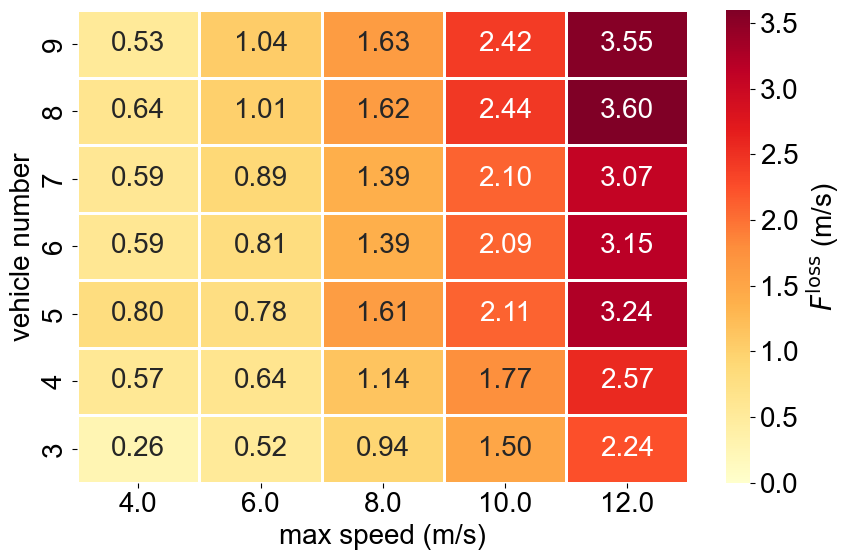

In [23]:
x_label = heatmap_car_following.x_param_label
y_label = heatmap_car_following.y_param_label
plt.figure(figsize=(9,6))
ax = sns.heatmap(df, cmap='YlOrRd', linewidths=2, vmin=0, vmax=3.6, annot=True, fmt=".2f") 
ax.collections[0].colorbar.set_label(r"$F^{\mathrm{loss}}$ (m/s)")
ax.invert_yaxis()
plt.xlabel(x_label)
plt.ylabel(y_label)
# plt.xlabel("最大速度 (m/s)")
# plt.ylabel("車両台数")
plt.tight_layout()
plt.savefig(f'../out/heatmap/img/following_{lane_label}_lane.png', dpi=150)
plt.show()

# Differencial Velocity

従来制御とCAVの協調制御における速度差

In [39]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

import heatmap_car_following

plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.family'] = 'Meiryo'

lane_label = "two"
lane_num = 3

In [40]:
# print
list_of_files = glob.glob(f'../out/heatmap/csv/following/following_{lane_label}_lane.csv')
for ind, file in enumerate(list_of_files):
    print(file)
latest_file = max(list_of_files, key=os.path.getctime)

../out/heatmap/csv/following/following_two_lane.csv


In [41]:
# import csv file
file_name_without_ext = os.path.splitext(os.path.basename(latest_file))[0]
print(file_name_without_ext)
follow_df = pd.read_csv(latest_file, index_col=0)
follow_df

following_two_lane


,4.0,6.0,8.0,10.0,12.0
3,0.206,0.431,0.771,1.220,1.784
4,0.234,0.455,0.767,1.196,1.726
5,0.232,0.524,0.676,1.055,1.525
6,0.271,0.560,0.698,1.058,1.523
7,0.237,0.491,0.611,0.937,1.351
8,0.416,0.524,0.634,0.960,1.381
9,0.385,0.472,0.570,0.866,1.247


In [42]:
# print
list_of_files = glob.glob(f'../out/heatmap/csv/{lane_label}_lane/*space_mean_speed.csv')
for ind, file in enumerate(list_of_files):
    print(file)
    df = pd.read_csv(file, index_col=0)
    if ind == 0:
        sum_count = df.values
    else:
        count = df.values
        sum_count += count

../out/heatmap/csv/two_lane/heatmap_0124-1713_loop06_row7_column5_space_mean_speed.csv
../out/heatmap/csv/two_lane/heatmap_0124-1714_loop07_row7_column5_space_mean_speed.csv
../out/heatmap/csv/two_lane/heatmap_0124-1709_loop01_row7_column5_space_mean_speed.csv
../out/heatmap/csv/two_lane/heatmap_0124-1711_loop03_row7_column5_space_mean_speed.csv
../out/heatmap/csv/two_lane/heatmap_0124-1713_loop05_row7_column5_space_mean_speed.csv
../out/heatmap/csv/two_lane/heatmap_0124-1712_loop04_row7_column5_space_mean_speed.csv
../out/heatmap/csv/two_lane/heatmap_0124-1716_loop09_row7_column5_space_mean_speed.csv
../out/heatmap/csv/two_lane/heatmap_0124-1710_loop02_row7_column5_space_mean_speed.csv
../out/heatmap/csv/two_lane/heatmap_0124-1715_loop08_row7_column5_space_mean_speed.csv
../out/heatmap/csv/two_lane/heatmap_0124-1708_loop00_row7_column5_space_mean_speed.csv


In [43]:
flock_df = pd.DataFrame(sum_count, index=[3,4,5,6,7,8,9], columns=[4.0,6.0,8.0,10.0,12.0])
flock_df /= 10

flock_df 

,4.0,6.0,8.0,10.0,12.0
3,0.088944,0.199588,0.315274,0.498984,0.737958
4,0.102962,0.262406,0.412171,0.572155,0.896855
5,0.124127,0.334374,0.525383,0.825167,1.501481
6,0.183670,0.417149,0.552150,0.809183,2.624701
7,0.089334,0.364100,0.700554,1.061890,1.631733
8,0.098671,0.638224,1.084775,1.626714,2.450481
9,0.071106,0.558436,0.745532,1.698131,2.661741


In [44]:
follow_array = follow_df.values
flock_array = flock_df.values
diff_array = -(flock_array - follow_array)
diff_df = pd.DataFrame(diff_array, index=[3,4,5,6,7,8,9], columns=[4.0,6.0,8.0,10.0,12.0])
diff_df

,4.0,6.0,8.0,10.0,12.0
3,0.117056,0.231412,0.455726,0.721016,1.046042
4,0.131038,0.192594,0.354829,0.623845,0.829145
5,0.107873,0.189626,0.150617,0.229833,0.023519
6,0.087330,0.142851,0.145850,0.248817,-1.101701
7,0.147666,0.126900,-0.089554,-0.124890,-0.280733
8,0.317329,-0.114224,-0.450775,-0.666714,-1.069481
9,0.313894,-0.086436,-0.175532,-0.832131,-1.414741


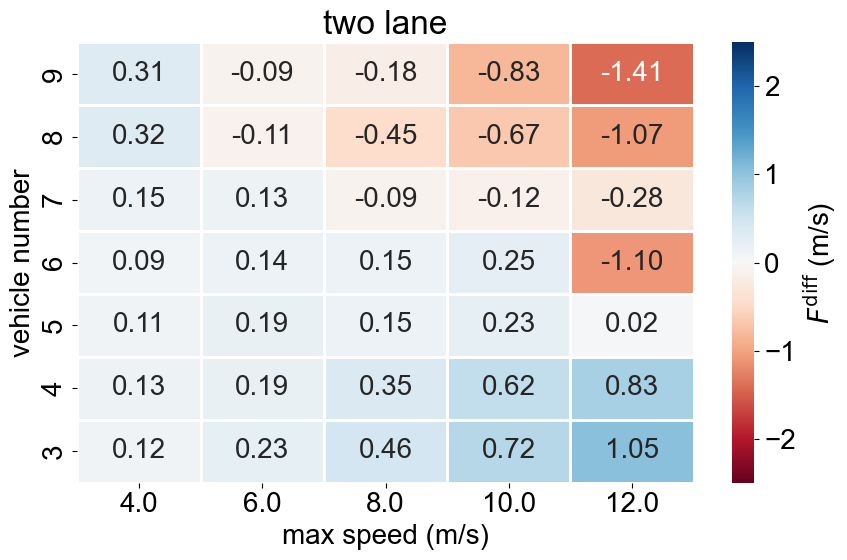

In [45]:
x_label = heatmap_car_following.x_param_label
y_label = heatmap_car_following.y_param_label
plt.figure(figsize=(9,6))
ax = sns.heatmap(diff_df, cmap='RdBu', linewidths=2, vmin=-2.5, vmax=2.5, annot=True, fmt=".2f") 
ax.collections[0].colorbar.set_label(r"$F^{\mathrm{diff}}$ (m/s)")
ax.invert_yaxis()
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"{lane_label} lane")
# ax.collections[0].colorbar.set_label("速度差 (m/s)")
# plt.xlabel("最大速度 (m/s)")
# plt.ylabel("車両台数")
# plt.title(f"{lane_num}車線道路")
plt.tight_layout()
plt.savefig(f'../out/heatmap/img/differential_velocity_{lane_label}.png', dpi=150)
plt.show()

# 発表スライド

In [7]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

import heatmap_car_following

plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'Meiryo'

lane_label = "three"
lane_num = 3

In [8]:
# print
list_of_files = glob.glob(f'../out/heatmap/csv/following/following_{lane_label}_lane.csv')
for ind, file in enumerate(list_of_files):
    print(file)
latest_file = max(list_of_files, key=os.path.getctime)

../out/heatmap/csv/following/following_three_lane.csv


In [9]:
# import csv file
file_name_without_ext = os.path.splitext(os.path.basename(latest_file))[0]
print(file_name_without_ext)
follow_df = pd.read_csv(latest_file, index_col=0)
follow_df

following_three_lane


,4.0,6.0,8.0,10.0,12.0
3,0.259,0.522,0.936,1.501,2.239
4,0.571,0.640,1.143,1.770,2.566
5,0.802,0.784,1.606,2.109,3.238
6,0.595,0.813,1.385,2.088,3.155
7,0.586,0.889,1.388,2.102,3.068
8,0.637,1.012,1.620,2.441,3.603
9,0.529,1.043,1.631,2.418,3.549


In [10]:
# print
list_of_files = glob.glob(f'../out/heatmap/csv/{lane_label}_lane/*space_mean_speed.csv')
for ind, file in enumerate(list_of_files):
    print(file)
    df = pd.read_csv(file, index_col=0)
    if ind == 0:
        sum_count = df.values
    else:
        count = df.values
        sum_count += count

../out/heatmap/csv/three_lane/heatmap_0122-1924_loop03_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1925_loop04_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1929_loop09_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1923_loop02_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1926_loop05_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1921_loop00_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1928_loop08_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1922_loop01_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1927_loop06_row7_column5_space_mean_speed.csv
../out/heatmap/csv/three_lane/heatmap_0122-1927_loop07_row7_column5_space_mean_speed.csv


In [11]:
flock_df = pd.DataFrame(sum_count, index=[3,4,5,6,7,8,9], columns=[4.0,6.0,8.0,10.0,12.0])
flock_df /= 10

follow_array = follow_df.values
flock_array = flock_df.values
diff_array = -(flock_array - follow_array)
diff_df = pd.DataFrame(diff_array, index=[3,4,5,6,7,8,9], columns=[4.0,6.0,8.0,10.0,12.0])

diff_df.to_csv(f'{lane_label}.csv')

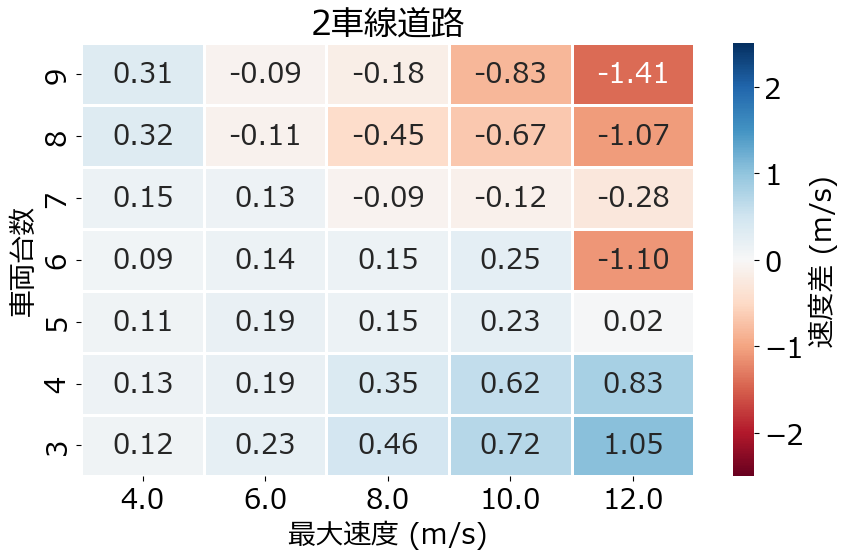

In [65]:
x_label = heatmap_car_following.x_param_label
y_label = heatmap_car_following.y_param_label
plt.figure(figsize=(9,6))
ax = sns.heatmap(diff_df, cmap='RdBu', linewidths=2, vmin=-2.5, vmax=2.5, annot=True, fmt=".2f") 
# ax.collections[0].colorbar.set_label(r"$F^{\mathrm{diff}}$ (m/s)")
ax.invert_yaxis()
# plt.xlabel(x_label)
# plt.ylabel(y_label)
# plt.title(f"{lane_label} lane")
ax.collections[0].colorbar.set_label("速度差 (m/s)")
plt.xlabel("最大速度 (m/s)")
plt.ylabel("車両台数")
plt.title(f"{lane_num}車線道路")
plt.tight_layout()
plt.savefig(f'../out/heatmap/img/slide_vel_{lane_label}.png', dpi=150)
plt.show()

In [12]:
# データの読み込み
three_df = pd.read_csv("three.csv", index_col=0, header=0)
two_df = pd.read_csv("two.csv", index_col=0, header=0)


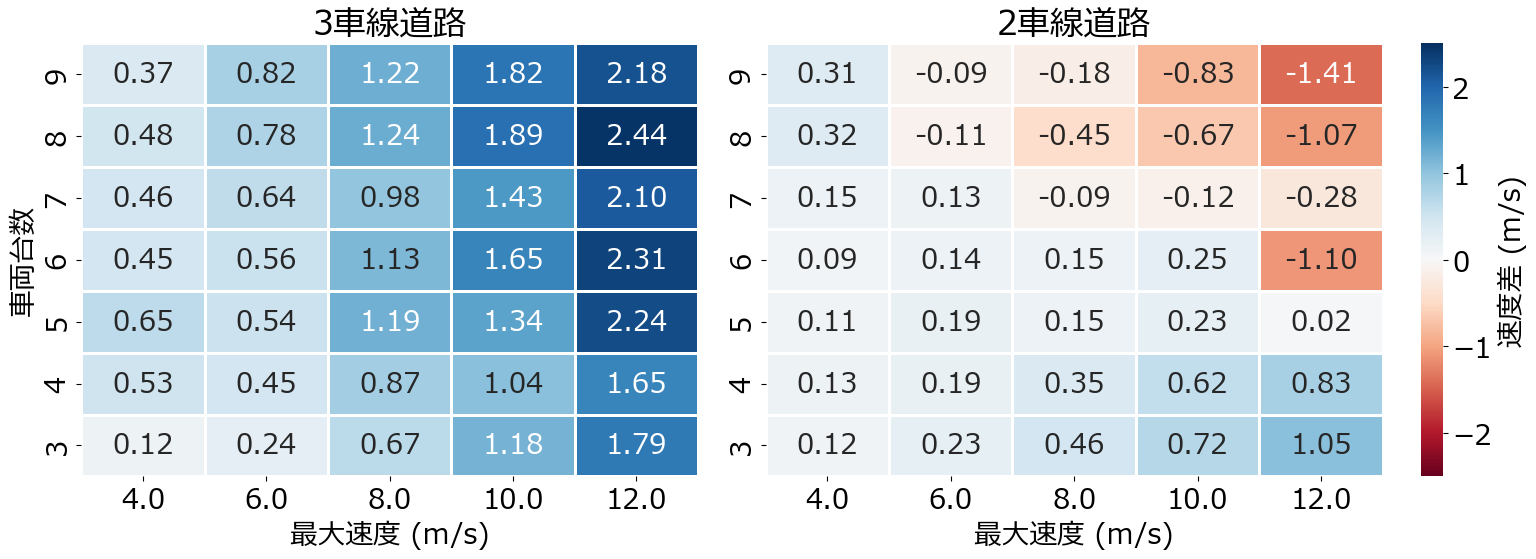

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1.25]}) # [1, 1.25]
sns.heatmap(three_df, ax=ax1, cmap='RdBu', linewidths=2, vmin=-2.5, vmax=2.5, annot=True, fmt=".2f", cbar=False)
sns.heatmap(two_df, ax=ax2, cmap='RdBu', linewidths=2, vmin=-2.5, vmax=2.5, annot=True, fmt=".2f", cbar=True)
ax1.invert_yaxis()
ax2.invert_yaxis()
ax2.set_ylabel("")
ax1.set_xlabel("最大速度 (m/s)")
ax1.set_ylabel("車両台数")
ax2.set_xlabel("最大速度 (m/s)")
ax2.collections[0].colorbar.set_label("速度差 (m/s)")
ax1.set_title("3車線道路")
ax2.set_title("2車線道路")
plt.tight_layout()
plt.savefig("slide.png",dpi=200)
plt.show()